In [1]:
# from matplotlib import rcParams
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Geneva', 'Lucid Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
# rcParams['font.weight'] = 'light'
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
plt.style.use('grayscale')
from matplotlib.font_manager import FontProperties
font0 = FontProperties()
def gen_font(weight, size):
    font1=font0.copy()
    font1.set_family('sans-serif')
    font1.set_weight(weight)
    font1.set_size(size)
    return font1

In [2]:
res15k80=[9.87,
18.91,
28.55,
38.03,
46.8,
57.3,
65.46,
75.81]

res15k80std=[0.14,0.26,0.40,0.60,0.74,0.80,1.01,1.01]

res32k80=[4.51,
9.06,
13.53,
18.13,
22.54,
26.91,
31.41,
36.02]

res32k80std=[0.04,0.09,0.12,0.19,0.18,0.23,0.32,0.33]

shakesmallk80=[2.53,
5.09,
7.61,
10.05,
12.58,
15.01,
17.38,
19.84]

shakesmallk80std=[0.02,0.06,0.06,0.10,0.20,0.27,0.32,0.39]

shakebigk80=[0.68,
1.34,
2.05,
2.64,
3.32,
3.97,
4.37,
5.02]

shakebigk80std=[0.002, 0.008, 0.023,0.045,0.087,0.112,0.150,0.192]

res15p100=[20.9,
47.1,
62.13,
78.72,
93.27,
96.12,
97.45,
103.69]

res15p100std=[0.55,1.18,0.89,1.78,2.29,2.11,1.96,6.22]

res32p100=[11.36,
22.54,
34.58,
40.8,
44.63,
44.23,
47.43,
43.15]

res32p100std=[0.22,0.34,0.39,0.84,0.73,1.06,0.74,0.76]

shakesmallp100=[6.72,
13.62,
19.52,
24.83,
27.05,
27.44,
28.27,
26.95]

shakesmallp100std=[0.07,0.19,0.22,0.48,0.68,0.43,0.72,0.53]

shakebigp100=[2.1,
3.96,
4.93,
6.01,
6.15,
5.99,
6.1,
6.52]

shakebigp100std=[0.02,0.07,0.09,0.12,0.18,0.18,0.28,0.24]

res15p100ps2=[25.93,
46.55,
70.38,
98.77,
120.19,
145.66,
163.43,
176.67]

res15p100ps2std=[0.59,0.91,1.82,1.75,3.18,1.84,2.97,3.42]

res32p100ps2=[12.47,
25.39,
40.21,
50.13,
65.06,
72.96,
80.23,
75.66]

res32p100ps2std=[0.18,0.31,0.34,0.57,0.74,1.06,1.83,1.48]

shakesmallp100ps2=[7.33,
14.41,
21.32,
28.07,
32.34,
33.37,
35.96,
34.25]

shakesmallp100ps2std=[0.08,0.16,0.24,0.48,0.80,0.90,0.82,0.69]

shakebigp100ps2=[2.18,
4.22,
5.68,
6.37,
6.49,
6.69,
6.04,
6.54]

shakebigp100ps2std=[0.02,0.05,0.11,0.14,0.14,0.17,0.44,0.23]

Text(0.5,15,'Number of K80 workers')

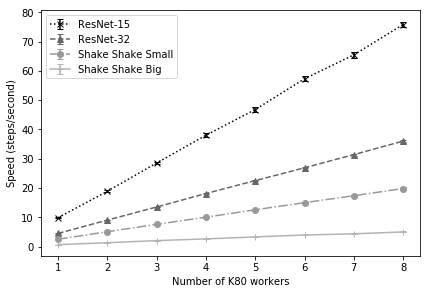

In [38]:
fig, ax = plt.subplots()
fig.tight_layout()
plt.errorbar(np.arange(8),res15k80, yerr=res15k80std,label='ResNet-15',linestyle=':', marker='x',capsize=3)
plt.errorbar(np.arange(8),res32k80,yerr=res32k80std,label='ResNet-32',linestyle='--', marker='^',capsize=3)
plt.errorbar(np.arange(8),shakesmallk80,yerr=shakesmallk80std,label='Shake Shake Small',linestyle='-.', marker='o',capsize=3)
plt.errorbar(np.arange(8),shakebigk80,yerr=shakebigk80std,label='Shake Shake Big',linestyle='-', marker='+',capsize=3)
plt.legend()
plt.xticks(np.arange(8), [1,2,3,4,5,6,7,8])
plt.ylabel("Speed (steps/second)")
plt.xlabel("Number of K80 workers")
# fig.savefig("/Users/ozymandias/Desktop/figure_5.pdf", bbox_inches='tight')

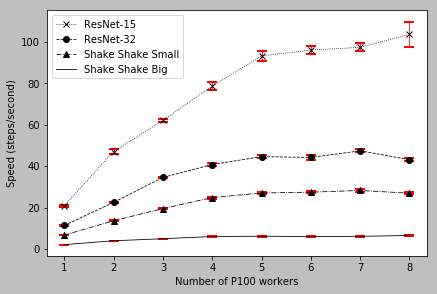

In [36]:
fig, ax = plt.subplots()
fig.tight_layout()
plt.errorbar(np.arange(8),res15p100,yerr=res15p100std,label='ResNet-15',linestyle=':',marker='x',ecolor='red',lw=0.8, capsize=5, capthick=2)
plt.errorbar(np.arange(8),res32p100,yerr=res32p100std,label='ResNet-32',linestyle='--',marker='o',ecolor='red',lw=0.8, capsize=5, capthick=2)
plt.errorbar(np.arange(8),shakesmallp100,yerr=shakesmallp100std,label='Shake Shake Small',marker='^',linestyle='-.',ecolor='red', lw=0.8,capsize=5, capthick=2)
plt.errorbar(np.arange(8),shakebigp100,yerr=shakebigp100std,label='Shake Shake Big',linestyle='-',ecolor='red', lw=0.8,capsize=5, capthick=2)
# plt.legend()
plt.xticks(np.arange(8), [1,2,3,4,5,6,7,8])
plt.ylabel("Speed (steps/second)")
plt.xlabel("Number of P100 workers")
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='upper left',numpoints=1)
# fig.savefig("/Users/ozymandias/Desktop/figure_5.pdf", bbox_inches='tight')

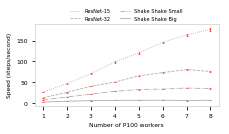

In [85]:
fig, ax = plt.subplots(figsize=(3.3,1.5))
font = gen_font('light',6)
font2 = gen_font('light',5)
# fig.tight_layout()
plt.errorbar(np.arange(8),res15p100ps2,yerr=res15p100ps2std,label='ResNet-15',linestyle=':',ecolor='red', lw=0.8, capsize=1, capthick=0.5, color='darkgray')
plt.errorbar(np.arange(8),res32p100ps2,yerr=res32p100ps2std,label='ResNet-32',linestyle='--',ecolor='red', lw=0.8, capsize=1, capthick=0.5, color='darkgray')
plt.errorbar(np.arange(8),shakesmallp100ps2,yerr=shakesmallp100ps2std,label='Shake Shake Small',linestyle='-.',ecolor='red', lw=0.8, capsize=1, capthick=0.5, color='darkgray')
plt.errorbar(np.arange(8),shakebigp100ps2,yerr=shakebigp100ps2std,label='Shake Shake Big',linestyle='-',ecolor='red', lw=0.8, capsize=1, capthick=0.5, color='darkgray')
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels,ncol=2,bbox_to_anchor=(0.5, 1.25) ,loc='upper center',numpoints=1, prop=font2, framealpha=0)
plt.xticks(np.arange(8), [1,2,3,4,5,6,7,8], fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel("Speed (steps/second)", fontproperties=font)
plt.xlabel("Number of P100 workers", fontproperties=font)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/cluster_size_training_speed.pdf", bbox_inches='tight')

Text(0.5,15,'Number of K80 workers')

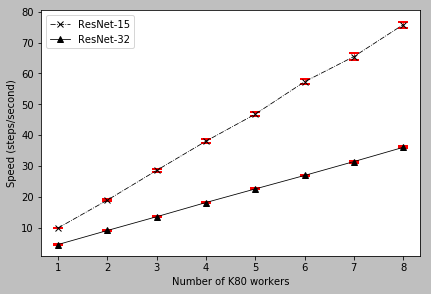

In [42]:
fig, ax = plt.subplots()
fig.tight_layout()
plt.errorbar(np.arange(8),res15k80, yerr=res15k80std,label='ResNet-15',linestyle='-.', marker='x',ecolor='red', lw=0.8, capsize=5, capthick=2)
plt.errorbar(np.arange(8),res32k80,yerr=res32k80std,label='ResNet-32',linestyle='-', marker='^',ecolor='red', lw=0.8, capsize=5, capthick=2)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='upper left',numpoints=1)
plt.xticks(np.arange(8), [1,2,3,4,5,6,7,8])
plt.ylabel("Speed (steps/second)")
plt.xlabel("Number of K80 workers")
# fig.savefig("/Users/ozymandias/Desktop/ps_bot_k80_1.pdf", bbox_inches='tight')

Text(0.5,15,'Number of K80 workers')

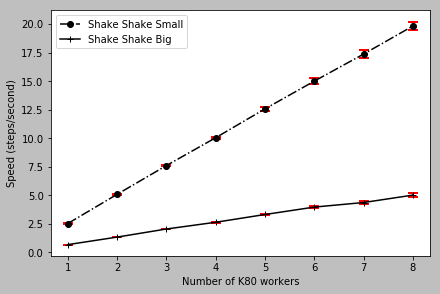

In [43]:
fig, ax = plt.subplots()
fig.tight_layout()
plt.errorbar(np.arange(8),shakesmallk80,yerr=shakesmallk80std,label='Shake Shake Small',linestyle='-.', marker='o',ecolor='red', capsize=5, capthick=2)
plt.errorbar(np.arange(8),shakebigk80,yerr=shakebigk80std,label='Shake Shake Big',linestyle='-', marker='+',ecolor='red', capsize=5, capthick=2)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='upper left',numpoints=1)
plt.xticks(np.arange(8), [1,2,3,4,5,6,7,8])
plt.ylabel("Speed (steps/second)")
plt.xlabel("Number of K80 workers")
# fig.savefig("/Users/ozymandias/Desktop/ps_bot_k80_2.pdf", bbox_inches='tight')

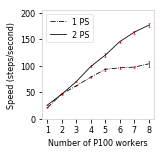

In [86]:
fig, ax = plt.subplots(figsize=(2,2))
# fig.tight_layout()
plt.errorbar(np.arange(8),res15p100,yerr=res15p100std,label='1 PS',linestyle='-.',ecolor='red',lw=0.8, capsize=1, capthick=0.5)
plt.errorbar(np.arange(8),res15p100ps2,yerr=res15p100ps2std,label='2 PS',linestyle='-',ecolor='red',lw=0.8, capsize=1, capthick=0.5)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
font = gen_font('light',8)
ax.legend(handles, labels, loc='upper left',numpoints=1, prop=font, framealpha=0.5)
# ax.set_xlim(0,8)
ax.set_ylim(ymin=0,ymax=205)
plt.setp(ax.spines.values(), color='lightgray')
# ax.tick_params(colors='darkgray')
plt.xticks(np.arange(8), [1,2,3,4,5,6,7,8], fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel("Speed (steps/second)", fontproperties=font)
plt.xlabel("Number of P100 workers", fontproperties=font)
fig.savefig("/Users/ozymandias/Desktop/ps_bot_p100_1.pdf", bbox_inches='tight')

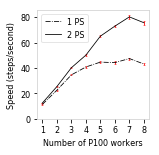

In [87]:
fig, ax = plt.subplots(figsize=(2,2))
# fig.tight_layout()
plt.errorbar(np.arange(8),res32p100,yerr=res32p100std,label='1 PS',linestyle='-.',ecolor='red',lw=0.8, capsize=1, capthick=0.5)
plt.errorbar(np.arange(8),res32p100ps2,yerr=res32p100ps2std,label='2 PS',linestyle='-',ecolor='red',lw=0.8, capsize=1, capthick=0.5)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='upper left',numpoints=1, prop=font,framealpha=0.5)
plt.xticks(np.arange(8), [1,2,3,4,5,6,7,8], fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel("Speed (steps/second)", fontproperties=font)
plt.xlabel("Number of P100 workers", fontproperties=font)
ax.set_ylim(ymin=0)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/ps_bot_p100_2.pdf", bbox_inches='tight')

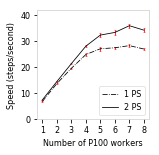

In [88]:
fig, ax = plt.subplots(figsize=(2,2))
# fig.tight_layout()
plt.errorbar(np.arange(8),shakesmallp100,yerr=shakesmallp100std,label='1 PS',linestyle='-.',ecolor='red',lw=0.8, capsize=1, capthick=0.5)
plt.errorbar(np.arange(8),shakesmallp100ps2,yerr=shakesmallp100ps2std,label='2 PS',linestyle='-',ecolor='red',lw=0.8, capsize=1, capthick=0.5)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='lower right',numpoints=1, prop=font,framealpha=0.5)
plt.xticks(np.arange(8), [1,2,3,4,5,6,7,8], fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel("Speed (steps/second)", fontproperties=font)
plt.xlabel("Number of P100 workers", fontproperties=font)
ax.set_ylim(ymin=0,ymax=42)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/ps_bot_p100_3.pdf", bbox_inches='tight')

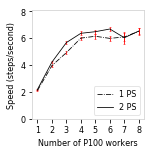

In [89]:
fig, ax = plt.subplots(figsize=(2,2))
# fig.tight_layout()
plt.errorbar(np.arange(8),shakebigp100,yerr=shakebigp100std,label='1 PS',linestyle='-.',ecolor='red',lw=0.8, capsize=1, capthick=0.5)
plt.errorbar(np.arange(8),shakebigp100ps2,yerr=shakebigp100ps2std,label='2 PS',linestyle='-',ecolor='red',lw=0.8, capsize=1, capthick=0.5)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='lower right',numpoints=1, prop=font,framealpha=0.5)
plt.xticks(np.arange(8), [1,2,3,4,5,6,7,8], fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel("Speed (steps/second)", fontproperties=font)
plt.xlabel("Number of P100 workers", fontproperties=font)
ax.set_ylim(ymin=0,ymax = 8.1)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/ps_bot_p100_4.pdf", bbox_inches='tight')

In [15]:
#############Lifetime#############

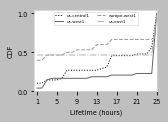

In [174]:
central=[0.1041666667,
0.1041666667,
0.1458333333,
0.1458333333,
0.1458333333,
0.1666666667,
0.2708333333,
0.2708333333,
0.2708333333,
0.2708333333,
0.2708333333,
0.2708333333,
0.2708333333,
0.2916666667,
0.3125,
0.4583333333,
0.4583333333,
0.4583333333,
0.4583333333,
0.4583333333,
0.4791666667,
0.4791666667,
0.4791666667,
0.5625,
1]

west = [0.04166666667,
0.04166666667,
0.1458333333,
0.1666666667,
0.1666666667,
0.1666666667,
0.1666666667,
0.1666666667,
0.1666666667,
0.1666666667,
0.1666666667,
0.1875,
0.1875,
0.1875,
0.1875,
0.2083333333,
0.2083333333,
0.2083333333,
0.2083333333,
0.2083333333,
0.2291666667,
0.2291666667,
0.2291666667,
0.2291666667,
1]

euro=[0.4,
0.4,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.5,
0.5,
0.5333333333,
0.5333333333,
0.5333333333,
0.5333333333,
0.6,
0.6,
0.6,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667]

east=[0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
1]

font = gen_font('light',6.5)
font2 = gen_font('light',4)

fig, ax = plt.subplots(figsize=(2.2,1.5))
# fig.tight_layout()
plt.plot(central, label='us-central1', linestyle=':',lw=1)
plt.plot(west, label = 'us-west1',lw=1)
plt.plot(euro, label='europe-west1', linestyle='--',lw=1)
plt.plot(east, label = 'us-east1', linestyle='-.',lw=1)
plt.xlabel('Lifetime (hours)', fontproperties=font)
plt.ylabel('CDF', fontproperties=font)
plt.xticks(np.arange(0, 28, 4), ['1','5','9','13','17','21','25'],fontproperties=font)
plt.yticks(fontproperties=font)
plt.legend(loc='upper center',ncol=2, bbox_to_anchor=(0.5, 1), prop=font2, framealpha=0.5)
ax.set_xlim(-0.5,24.1)
ax.set_ylim(ymin=0)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/k80_cdf.pdf", bbox_inches='tight')

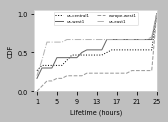

In [175]:
east = [0.2,
0.4,
0.6333333333,
0.6333333333,
0.6333333333,
0.6333333333,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.7,
1]

euwest = [0,
0.06666666667,
0.1333333333,
0.1333333333,
0.1666666667,
0.1666666667,
0.2,
0.2,
0.2,
0.2,
0.2333333333,
0.2333333333,
0.2333333333,
0.2333333333,
0.2333333333,
0.2333333333,
0.2333333333,
0.2333333333,
0.2333333333,
0.2666666667,
0.2666666667,
0.2666666667,
0.2666666667,
0.2666666667,
1]

central=[0.2666666667,
0.3333333333,
0.3333333333,
0.3333333333,
0.3333333333,
0.3333333333,
0.4,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.5,
0.5333333333,
0.5333333333,
0.5333333333,
0.5333333333,
0.5333333333,
0.5333333333,
0.5333333333,
0.5333333333,
0.5333333333,
1]

uswest=[0.1666666667,
0.3,
0.3,
0.3,
0.4333333333,
0.4333333333,
0.4333333333,
0.4333333333,
0.4333333333,
0.5,
0.5333333333,
0.5333333333,
0.5333333333,
0.5333333333,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
1]

fig, ax = plt.subplots(figsize=(2.2,1.5))
# fig.tight_layout()
plt.plot(central, label='us-central1', linestyle=':',lw=1)
plt.plot(uswest, label = 'us-west1',lw=1)
plt.plot(euwest, label='europe-west1', linestyle='--',lw=1)
plt.plot(east, label = 'us-east1', linestyle='-.',lw=1)
plt.xlabel('Lifetime (hours)', fontproperties=font)
plt.ylabel('CDF', fontproperties=font)
plt.xticks(np.arange(0, 28, 4), ['1','5','9','13','17','21','25'],fontproperties=font)
plt.yticks(fontproperties=font)
plt.legend(loc='upper center',ncol=2, bbox_to_anchor=(0.5, 1), prop=font2, framealpha=0.5)
ax.set_xlim(-0.5,24.1)
ax.set_ylim(ymin=0)
plt.setp(ax.spines.values(), color='lightgray')
# fig.show()
fig.savefig("/Users/ozymandias/Desktop/p100_cdf.pdf", bbox_inches='tight')

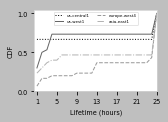

In [176]:
euwest4=[0.06666666667,
0.1666666667,
0.1666666667,
0.2,
0.2,
0.2,
0.2,
0.2,
0.2333333333,
0.2333333333,
0.2333333333,
0.2333333333,
0.3666666667,
0.3666666667,
0.3666666667,
0.3666666667,
0.3666666667,
0.3666666667,
0.3666666667,
0.3666666667,
0.3666666667,
0.3666666667,
0.3666666667,
0.4333333333,
1]

asia=[0.2333333333,
0.3,
0.3666666667,
0.4,
0.4,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
0.4666666667,
1]

central=[0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
0.6666666667,
1]

west=[0.3,
0.5,
0.5333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
0.7333333333,
1]

fig, ax = plt.subplots(figsize=(2.2,1.5))
# fig.tight_layout()
plt.style.use('grayscale')
plt.plot(central, label='us-central1', linestyle=':',lw=1)
plt.plot(west, label = 'us-west1',lw=1)
plt.plot(euwest4, label='europe-west4', linestyle='--',lw=1)
plt.plot(asia, label = 'asia-east1', linestyle='-.',lw=1)
plt.xlabel('Lifetime (hours)', fontproperties=font)
plt.ylabel('CDF', fontproperties=font)
plt.xticks(np.arange(0, 28, 4), ['1','5','9','13','17','21','25'],fontproperties=font)
plt.yticks(fontproperties=font)
plt.legend(loc='upper center',ncol=2, bbox_to_anchor=(0.5, 1), prop=font2, framealpha=0.5)
ax.set_xlim(-0.5,24.1)
ax.set_ylim(ymin=0)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/v100_cdf.pdf", bbox_inches='tight')

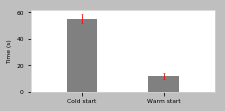

In [187]:
dat1=55.084635
dat2=11.872541
font = gen_font('light',6)
fig, ax = plt.subplots(figsize=(3.3,1.5))
# fig.tight_layout()
ax.set_xlim(0,0.9)
plt.bar([0.25, 0.65],[dat1,dat2], yerr=[3.44,2.24], color='gray',width=0.15,error_kw=dict(ecolor='red', lw=0.8, capsize=1, capthick=0.5))
plt.xticks([0.25,0.65], ['Cold start','Warm start'], fontproperties=font)
plt.yticks(fontproperties=font)
plt.setp(ax.spines.values(), color='lightgray')
plt.ylabel('Time (s)', fontproperties=font)
fig.savefig("/Users/ozymandias/Desktop/tf_restart.pdf", bbox_inches='tight')

1.3160547101089661 1.1164228589562264 0.6798692684790412 0.14727148022916334
0.30241693074297266 0.14399999999999946 0.17745108872275028 0.3456395039150862


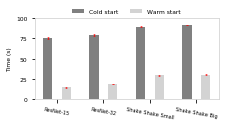

In [23]:
res15cold=[78,
76,
74.7,
74.4,
74.9]
res15warm=[15.1,
15.06,
14.6,
14.9,
14.3]
res32cold=[78.4,
80,
77.8,
80.1,
77.4]
res32warm=[18.8,
19.1,
19,
19.07,
19.24]
shakesmallcold=[88.44,
88.84,
90.04]
shakesmallwarm=[29.4,
29.24,
29.67]
shakebigcold=[91,
90.84,
90.64]
shakebigwarm=[31.04,
30.24,
30.4]
font = gen_font('light',6)
font2 = gen_font('light',5)
fig, ax = plt.subplots(figsize=(3.3,1.5))
# fig.tight_layout()
# ax.set_xlim(0,0.9)
ax.set_ylim(0,100)
plt.bar([-0.2,0.8,1.8,2.8],[np.mean(res15cold),np.mean(res32cold),np.mean(shakesmallcold),np.mean(shakebigcold)],yerr=[np.std(res15cold),np.std(res32cold),np.std(shakesmallcold),np.std(shakebigcold)],color='gray',label="Cold start",width=0.2,error_kw=dict(ecolor='red', lw=0.8, capsize=1, capthick=0.5))
plt.bar([0.2,1.2,2.2,3.2],[np.mean(res15warm),np.mean(res32warm),np.mean(shakesmallwarm),np.mean(shakebigwarm)],yerr=[np.std(res15warm),np.std(res32warm),np.std(shakesmallwarm),np.std(shakebigwarm)],color='lightgray',label="Warm start",width=0.2,error_kw=dict(ecolor='red', lw=0.8, capsize=1, capthick=0.5))
# plt.bar([0.25, 0.65],[dat1,dat2], yerr=[3.44,2.24], color='gray',width=0.15,error_kw=dict(ecolor='red', lw=0.8, capsize=1, capthick=0.5))
plt.xticks(np.arange(4), ['ResNet-15','ResNet-32','Shake Shake Small', 'Shake Shake Big'], fontproperties=font2, rotation=-10)
plt.yticks(fontproperties=font)
plt.legend(loc='upper center',ncol=2, bbox_to_anchor=(0.5, 1.18), prop=font, framealpha=0)
plt.setp(ax.spines.values(), color='lightgray')
plt.ylabel('Time (s)', fontproperties=font)
# fig.savefig("/Users/ozymandias/Desktop/tf_restart.pdf", bbox_inches='tight')

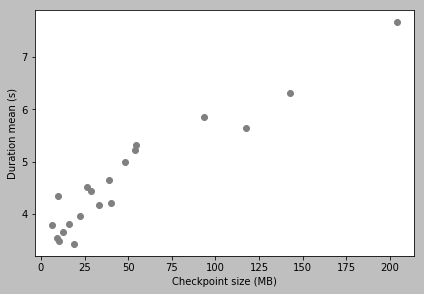

In [36]:
dat3 = [3.79,
3.82,
3.54,
3.48,
3.65,
3.97,
4.44,
4.65,
5.00,
5.31,
4.35,
4.52,
5.23,
5.86,
6.31,
7.66,
3.43,
4.21,
4.18,
5.65]

dat4 = [6.27,
15.99,
9.26,
10.57,
12.78,
22.45,
28.7,
38.85,
48.15,
54.26,
9.57,
26.39,
54.19,
93.33,
143.01,
204.04,
19.21,
40.41,
33.18,
117.61]

fig, ax = plt.subplots()
fig.tight_layout()
plt.xlabel('Checkpoint size (MB)')
plt.ylabel('Duration mean (s)')
plt.scatter(dat4, dat3, color='gray')
fig.savefig("/Users/ozymandias/Desktop/figure_12.pdf", bbox_inches='tight')

In [58]:
############Uptime vs. revocation

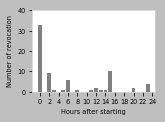

In [179]:
k80=[33,
0,
9,
1,
0,
1,
6,
0,
1,
0,
0,
1,
2,
1,
1,
10,
0,
0,
0,
0,
2,
0,
0,
4]

p100=[19,
14,
9,
0,
5,
0,
4,
2,
0,
2,
2,
0,
0,
0,
5,
1,
0,
0,
0,
1,
0,
0,
0,
1]

v100=[38,
11,
3,
8,
0,
2,
0,
0,
1,
0,
0,
0,
4,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
2]

font = gen_font('light',6.5)

fig, ax = plt.subplots(figsize=(2.2,1.5))
# fig.tight_layout()
plt.bar(np.arange(24), k80, color='gray')
plt.xticks(np.arange(0, 26, 2),fontproperties=font)
plt.yticks(fontproperties=font)
ax.set_ylim(0, 40)
plt.xlabel('Hours after starting', fontproperties=font)
plt.ylabel('Number of revocation', fontproperties=font)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/k80_hour_after_starting.pdf", bbox_inches='tight')

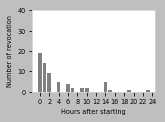

In [180]:
fig, ax = plt.subplots(figsize=(2.2,1.5))
# fig.tight_layout()
plt.bar(np.arange(24), p100, color='gray')
plt.xticks(np.arange(0, 26, 2),fontproperties=font)
plt.yticks(fontproperties=font)
ax.set_ylim(0, 40)
plt.xlabel('Hours after starting', fontproperties=font)
plt.ylabel('Number of revocation', fontproperties=font)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/p100_hour_after_starting.pdf", bbox_inches='tight')

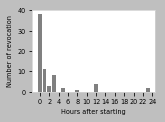

In [181]:
fig, ax = plt.subplots(figsize=(2.2,1.5))
# fig.tight_layout()
plt.bar(np.arange(24), v100, color='gray')
plt.xticks(np.arange(0, 26, 2),fontproperties=font)
plt.yticks(fontproperties=font)
ax.set_ylim(0, 40)
plt.xlabel('Hours after starting', fontproperties=font)
plt.ylabel('Number of revocation', fontproperties=font)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/v100_hour_after_starting.pdf", bbox_inches='tight')

In [19]:
############Time of day

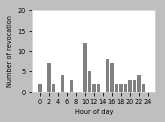

In [184]:
k80=[2,
0,
7,
2,
0,
4,
0,
3,
0,
0,
12,
5,
2,
2,
0,
8,
7,
2,
2,
2,
3,
3,
4,
2,0]

p100=[0,
0,
2,
1,
2,
1,
4,
1,
0,
2,
1,
9,
4,
19,
1,
3,
4,
4,
0,
0,
1,
6,
0,
0,0]

v100=[0,
2,
0,
4,
2,
0,
2,
4,
1,
9,
6,
3,
11,
12,
1,
7,
0,
0,
0,
0,
0,
4,
1,
0,0]

font = gen_font('light',6.5)

fig, ax = plt.subplots(figsize=(2.2,1.5))
# fig.tight_layout()
plt.bar(np.arange(25), k80, color='gray')
plt.xticks(np.arange(0, 26, 2),fontproperties=font)
plt.yticks(fontproperties=font)
ax.set_ylim(0, 20)
plt.xlabel('Hour of day', fontproperties=font)
plt.ylabel('Number of revocation', fontproperties=font)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/k80_hour_of_day.pdf", bbox_inches='tight')

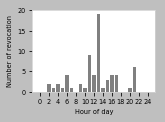

In [185]:
fig, ax = plt.subplots(figsize=(2.2,1.5))
# fig.tight_layout()
plt.bar(np.arange(25), p100, color='gray')
plt.xticks(np.arange(0, 26, 2),fontproperties=font)
plt.yticks(fontproperties=font)
ax.set_ylim(0, 20)
plt.xlabel('Hour of day', fontproperties=font)
plt.ylabel('Number of revocation', fontproperties=font)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/p100_hour_of_day.pdf", bbox_inches='tight')

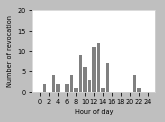

In [186]:
fig, ax = plt.subplots(figsize=(2.2,1.5))
# fig.tight_layout()
plt.bar(np.arange(25), v100, color='gray')
plt.xticks(np.arange(0, 26, 2),fontproperties=font)
plt.yticks(fontproperties=font)
ax.set_ylim(0, 20)
plt.xlabel('Hour of day', fontproperties=font)
plt.ylabel('Number of revocation', fontproperties=font)
plt.setp(ax.spines.values(), color='lightgray')
fig.savefig("/Users/ozymandias/Desktop/v100_hour_of_day.pdf", bbox_inches='tight')